In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/Train.csv', index_col=0)

In [4]:
df.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [6]:
df.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
object_cols = list(df.select_dtypes('O').columns)
object_cols

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [8]:
df2 = df.copy()
df2 = pd.get_dummies(df, drop_first=True, columns=object_cols)
df2

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
ID,,,,,,,,,,,,,,,,
1,4,2,177,3,44,1233,1,False,False,True,False,False,False,True,False,False
2,4,5,216,2,59,3088,1,False,False,False,True,False,False,True,False,True
3,2,2,183,4,48,3374,1,False,False,False,False,False,False,True,False,True
4,3,3,176,4,10,1177,1,True,False,False,False,False,False,False,True,True
5,2,2,184,3,46,2484,1,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,4,1,252,5,1,1538,1,False,False,False,False,False,True,False,True,False
10996,4,1,232,5,6,1247,0,True,False,False,False,False,True,False,True,False
10997,5,4,242,5,4,1155,0,False,True,False,False,False,True,True,False,False


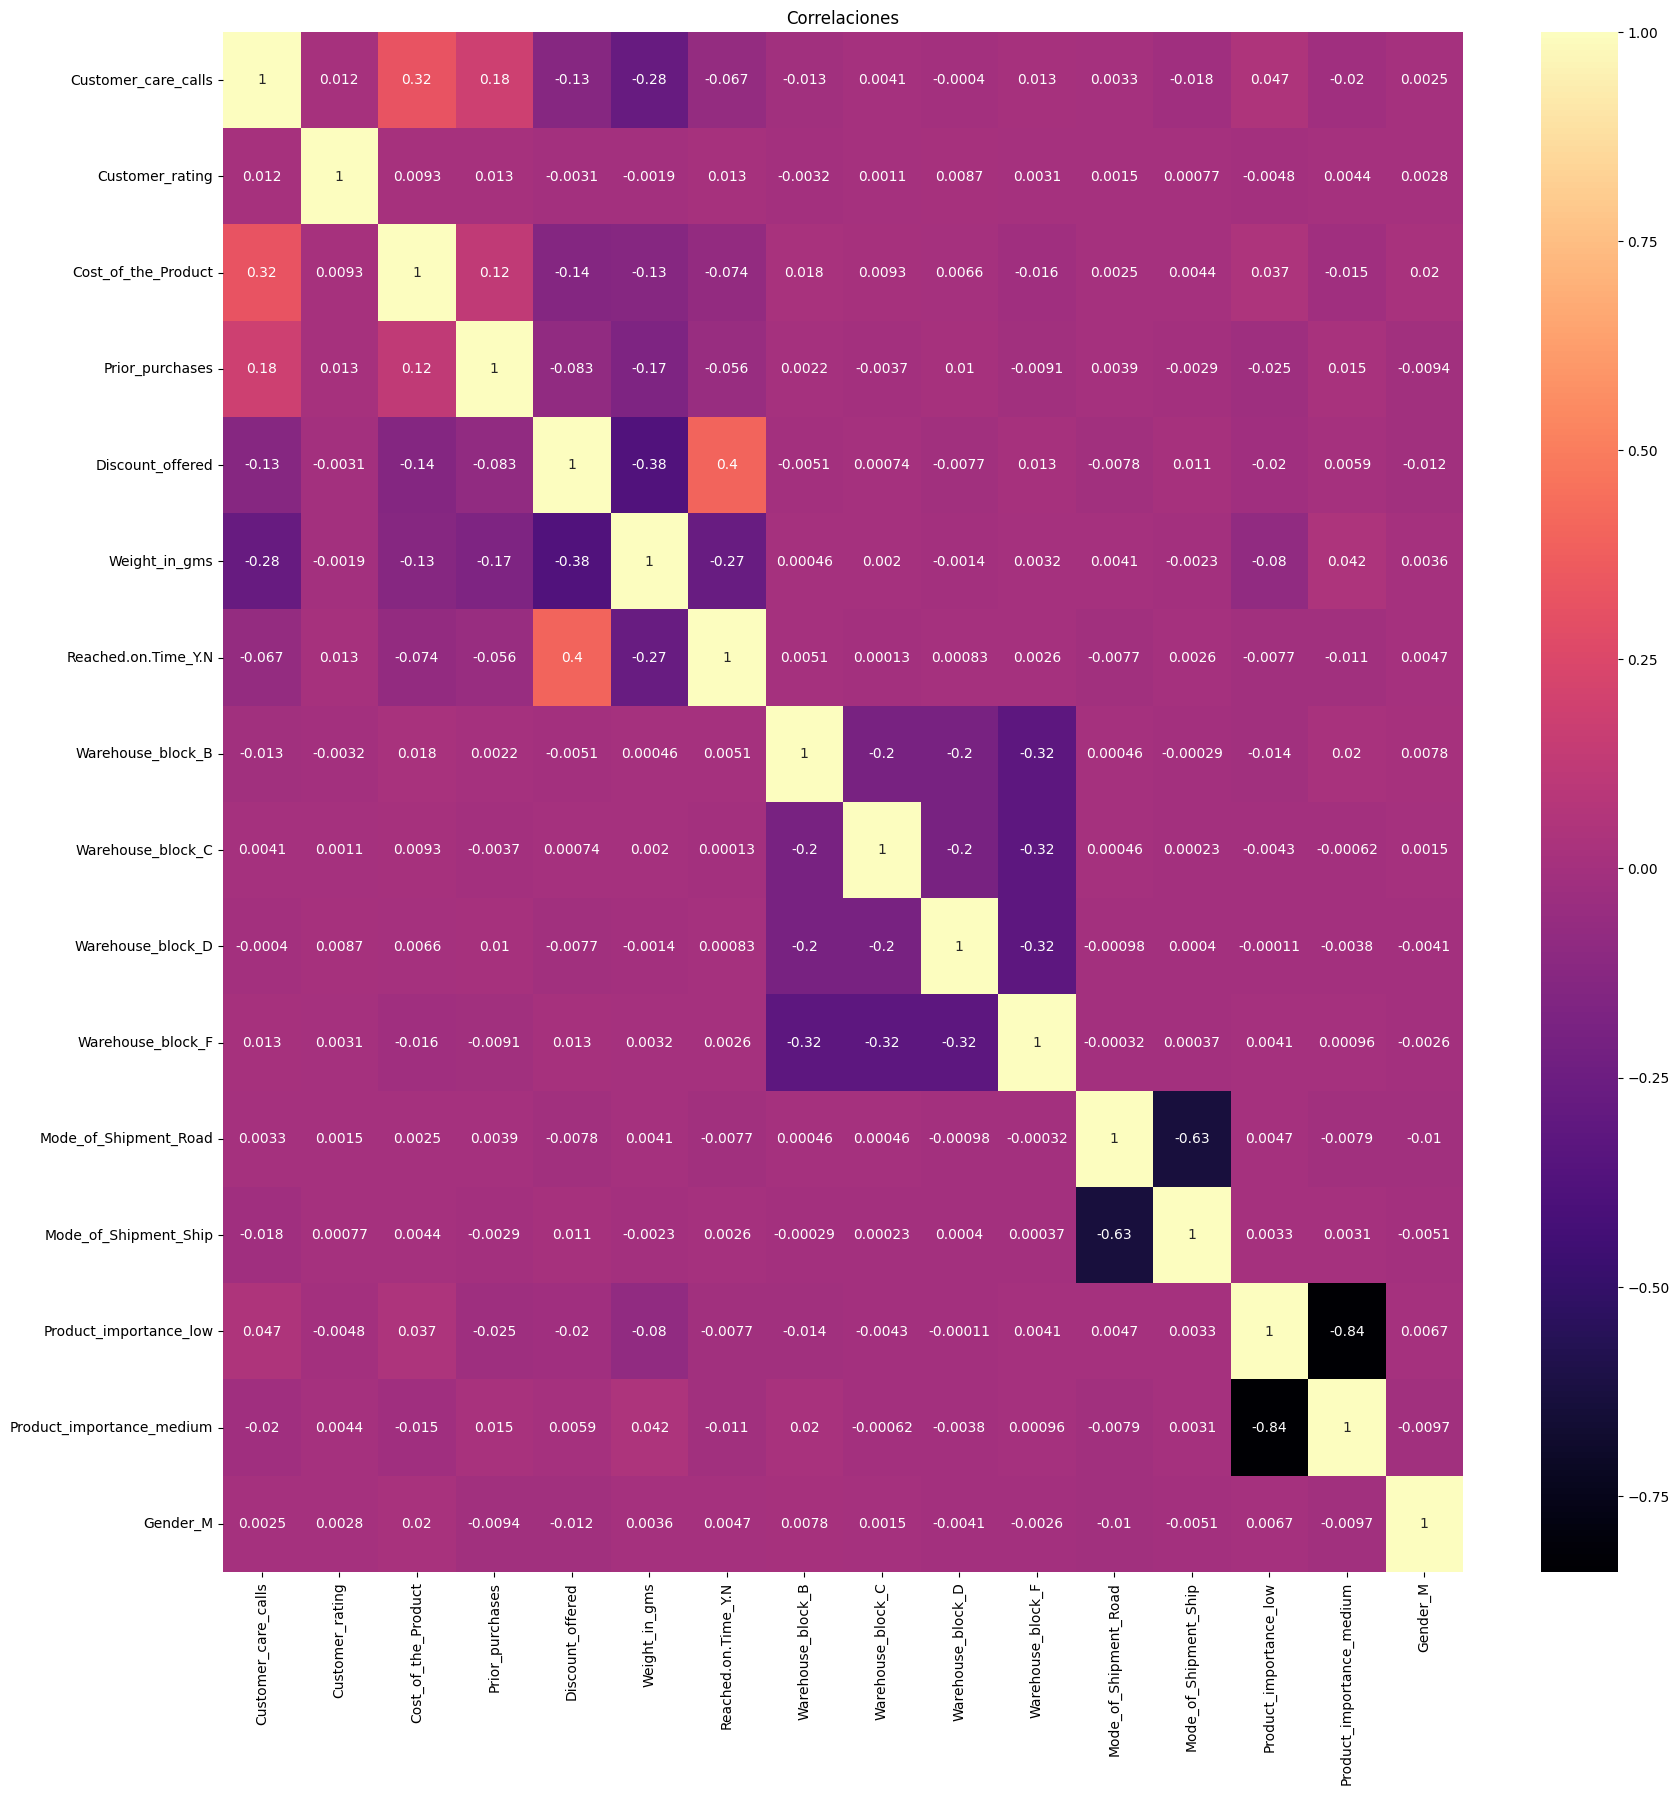

In [9]:
corr = df2.corr()
plt.figure(figsize=(20,20))
plt.title('Correlaciones')
sns.heatmap(corr, annot=True, cmap='magma');

In [11]:
df2.to_csv('../Data/df.csv')